In [2]:
import logging, time, sys, os, json, pickle
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
import pandas as pd
from shapely import geometry
from shapely import wkt

logger = logging.getLogger(__name__)

In [3]:
all_data_dirs = {
            'cities-N':              os.path.join(os.getcwd(),'..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join(os.getcwd(),'..','results_backup','output','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join(os.getcwd(),'..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join(os.getcwd(),'..','results_backup','output','cities_railways_edge_dataframe.csv'),
            'coalmines-railways':    os.path.join(os.getcwd(),'..','results_backup','output','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join(os.getcwd(),'..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join(os.getcwd(),'..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join(os.getcwd(),'..','results_backup','output','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join(os.getcwd(),'..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join(os.getcwd(),'..','results_backup','output','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join(os.getcwd(),'..','results_backup','output','oil_field_nodes_dataframe.csv'),
            'pipelines-pipelines':   os.path.join(os.getcwd(),'..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join(os.getcwd(),'..','results_backup','output','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join(os.getcwd(),'..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join(os.getcwd(),'..','results_backup','output','port_pipeline_edge_dataframe.csv'),
            'ports-railways':        os.path.join(os.getcwd(),'..','results_backup','output','port_railway_edge_dataframe.csv'),
            'ports-shipping':        os.path.join(os.getcwd(),'..','results_backup','output','port_ship_edge_dataframe.csv'),
            'powerstn-N':            os.path.join(os.getcwd(),'..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join(os.getcwd(),'..','results_backup','output','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join(os.getcwd(),'..','results_backup','output','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join(os.getcwd(),'..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join(os.getcwd(),'..','results_backup','output','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join(os.getcwd(),'..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join(os.getcwd(),'..','results_backup','output','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join(os.getcwd(),'..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join(os.getcwd(),'..','results_backup','output','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join(os.getcwd(),'..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join(os.getcwd(),'..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join(os.getcwd(),'..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join(os.getcwd(),'..','results_backup','output','well_pad_pipeline_edge_dataframe.csv'),
        }

In [4]:
df_names = {
    'pipelines-N':{'ports-N':'ports-pipelines',
                'cities-N':'pipelines-cities',
                'powerstn-N':'powerstn-pipelines',
                'lng-N':'lng-pipelines',
                'procplant-N':'procplant-pipelines',
                'refineries-N':'refineries-pipelines',
                'wellpads-N':'wellpads-pipelines',
                'oilfields-N':'oilfields-pipelines'},
    'railways-N':{'cities-N':'railways-cities',
                'coalmines-N':'coalmines-railways',
                'powerstn-N':'powerstn-railways',
                'ports-N':'ports-railways'}
    }

In [5]:
oilfields_df = pd.read_csv(all_data_dirs['oilfields-N'])

In [42]:
oilfields_df['coordinates'] = oilfields_df['coordinates'].apply(json.loads)

In [17]:
def _nest_coords(row):
        if row['geometry_type']=='MultiPolygon':
            return row['coordinates']
        else:
            return [list(row['coordinates'])]

In [43]:
def _return_geom(row):
        if row['geometry_type']=='MultiPolygon':
            return geometry.MultiPolygon([geometry.Polygon(el) for el in row['coordinates'][0]])
        elif row['geometry_type']=='Polygon':
            return geometry.Polygon(row['coordinates'][0])

In [44]:
oilfields_df['geometry'] = oilfields_df.apply(lambda row: _return_geom(row), axis=1)

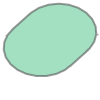

In [50]:
oilfields_df['geometry'].iloc[-3]

In [51]:
oilfields_df['_geom'] = oilfields_df['geometry'].apply(lambda _geom: [_geom.representative_point().x, _geom.representative_point().y])

In [53]:
oilfields_df.to_csv(os.path.join(os.getcwd(),'..','results_backup','oil_field_nodes_fixup.csv'))

In [8]:
oilfields_primary = pickle.load(open(os.path.join(os.getcwd(),'..','results_backup','primary','prm_oil_field_data.pkl'),'rb'))

In [9]:
oilfields_primary

,item_id,commodity,facility_n,installati,md_country,md_fkey,md_region,md_source,md_source0,md_source_,...,operator,shape_area,shape_leng,sour_ranks,spat_ranks,status,temp_ranks,field_type,coordinates,geometry_type
0,0,None,North Crimea Basin,None,Ukraine,407,Europe,https://worldmap.harvard.edu/data/geonode:loca...,5.0,2007,...,None,2.825397e+09,189523.478274,5.0; 5.0; 5.0,2.0; 2.0; 2.0,None,3.0; 3.0; 3.0,2,"[[[30.874705166735744, 45.61529619751774], [30...",Polygon
1,1,None,North Crimea Basin,None,Ukraine,407,Europe,https://worldmap.harvard.edu/data/geonode:loca...,5.0,2007,...,None,8.424441e+09,360562.407128,5.0; 5.0; 5.0,2.0; 2.0; 2.0,None,3.0; 3.0; 3.0,1,"[[[31.54499441891102, 45.50967917742115], [31....",Polygon
2,2,None,East Venezuela Basin,None,"Trinidad and Tobago; Venezuela, Bolivarian Rep...",407,N. and C. America; South America,https://worldmap.harvard.edu/data/geonode:loca...,5.0,2007,...,None,1.931163e+10,869799.018362,5.0; 5.0; 5.0,2.0; 2.0; 2.0,None,3.0; 3.0; 3.0,1,"[[[-61.90917205700183, 10.037498470481351], [-...",Polygon
3,3,None,Guajira Basin,None,Colombia,407,South America,https://worldmap.harvard.edu/data/geonode:loca...,5.0,2007,...,None,3.531904e+09,229306.083092,5.0; 5.0; 5.0,2.0; 2.0; 2.0,None,3.0; 3.0; 3.0,1,"[[[-72.58677024375478, 11.754406305182677], [-...",Polygon
4,4,None,Gulf of Guinea,None,Cote D''Ivoire; Ghana,407,Africa,https://worldmap.harvard.edu/data/geonode:loca...,5.0,2007,...,None,8.983897e+09,645374.035555,5.0; 5.0; 5.0,2.0; 2.0; 2.0,None,3.0; 3.0; 3.0,1,"[[[-4.110169632563522, 5.120581033984478], [-4...",Polygon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25231,25231,None,ANSCHUTZ RANCH,19678,United States of America,1046,None,https://www.eia.gov/maps/maps.htm,5.0,Updated 5/03/2005,...,19678,4.531330e+07,37346.986577,5; 5; 5,5; 5; 5,UT,5; 5; 5,UT,"[[[[-111.17830061693093, 41.01118029772712], [...",MultiPolygon
25232,25232,None,ANSCHUTZ RANCH E_UT_S,2380,United States of America,1046,None,https://www.eia.gov/maps/maps.htm,5.0,Updated 5/03/2005,...,2380,3.622116e+07,40573.343450,5; 5; 5,5; 5; 5,UT,5; 5; 5,UT,"[[[[-111.1239673847413, 41.01535694081961], [-...",MultiPolygon
25233,25233,None,FIRTH,17236,United States of America,1046,None,https://www.eia.gov/maps/maps.htm,5.0,Updated 5/03/2005,...,17236,1.174448e+07,13439.985576,5; 5; 5,5; 5; 5,UT,5; 5; 5,UT,"[[[-111.07674551226826, 41.1957995697748], [-1...",Polygon
25234,25234,None,HOGBACK RIDGE,326692,United States of America,1046,None,https://www.eia.gov/maps/maps.htm,5.0,Updated 5/03/2005,...,326692,8.047369e+06,10513.396846,5; 5; 5,5; 5; 5,UT,5; 5; 5,UT,"[[[-111.18843770010214, 41.85058079215037], [-...",Polygon


In [121]:
cities_df

,city_id,em_ed_manufacturing,em_ed_nonmetallic_minerals,em_ed_chemical_processes,em_ed_iron_steel_manufacturing,em_ed_nonferrous_metal_production,em_ed_solvent_products,em_sec_industry,en_sec_industry_coal,en_sec_industry_oil,...,em_ed_shipping,em_sec_shipping,en_sec_shipping_coal,en_sec_shipping_oil,en_sec_shipping_gas,total_oil_consumption,total_coal_consumption,total_gas_consumption,:LABEL,CityNodeId:ID(CityNode)
0,0,7435.119696,5710.450289,1207.577099,0.000000,4216.457203,3654.525399,22224.129686,81545.641518,1.936540e+05,...,1391.790529,1391.790529,0.0,-2.440781e+08,-55462.846110,2.463917e+08,8.207831e+04,62948.571487,CityNode,city_node_0
1,1,12225.143075,308.723838,2015.415935,0.000000,0.000000,2220.106213,16769.389061,61530.894941,1.461231e+05,...,1184.679909,1184.679909,0.0,-2.077572e+08,-47209.488860,2.101727e+08,6.179216e+04,51333.251323,CityNode,city_node_1
2,2,16182.671737,5835.555748,2649.997738,0.000000,4143.330319,5265.466931,34077.022473,125036.736999,2.969363e+05,...,46.512058,46.512058,0.0,-8.156813e+06,-1853.505285,1.771241e+07,1.259028e+05,12636.836585,CityNode,city_node_2
3,3,15987.369870,5323.717696,2619.468710,0.000000,3756.309988,4997.704102,32684.570366,119927.497540,2.848029e+05,...,960.009741,960.009741,0.0,-1.683568e+08,-38256.383710,1.745643e+08,1.205722e+05,48017.782410,CityNode,city_node_3
4,4,14045.258506,354.687512,2315.478330,0.000000,0.000000,2545.374377,19260.798726,70672.472239,1.678325e+05,...,422.619505,422.619505,0.0,-7.411473e+07,-16841.385307,7.879647e+07,7.095819e+04,21375.721907,CityNode,city_node_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,13224,176556.494449,5399.731586,46982.257122,0.000000,0.000000,16470.183642,245408.666799,469274.317549,2.707352e+06,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,5.909157e+06,1.322445e+06,0.000000,CityNode,city_node_13224
13225,13225,56301.390149,2340.561511,8012.142308,0.000000,0.000000,6345.434001,72999.527970,139590.847039,8.053318e+05,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,2.623914e+06,5.197555e+05,0.000000,CityNode,city_node_13225
13226,13226,176953.538629,29868.049050,13972.346608,0.000000,0.000000,10887.256444,231681.190731,443024.421620,2.555910e+06,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,4.807168e+06,1.069115e+06,0.000000,CityNode,city_node_13226
13227,13227,70775.814963,2611.834291,10278.495060,0.000000,0.000000,8154.529799,91820.674113,175580.939105,1.012967e+06,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,4.334543e+06,7.413206e+05,0.000000,CityNode,city_node_13227


In [127]:
cities_int = pd.read_csv('./../results_backup/intermediate/int_cities.csv')

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21,30,51,53,62,64,76,88,95,105,109,112,116,122,131,136,142,147,152,158,173,175,193,204) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [139]:
def rep_pt(geom):
    return wkt.loads(geom).representative_point()

In [146]:
cities_df = cities_df.join(cities_int.geometry.apply(rep_pt))

In [145]:
cities_df

,city_id,em_ed_manufacturing,em_ed_nonmetallic_minerals,em_ed_chemical_processes,em_ed_iron_steel_manufacturing,em_ed_nonferrous_metal_production,em_ed_solvent_products,em_sec_industry,en_sec_industry_coal,en_sec_industry_oil,...,em_ed_shipping,em_sec_shipping,en_sec_shipping_coal,en_sec_shipping_oil,en_sec_shipping_gas,total_oil_consumption,total_coal_consumption,total_gas_consumption,:LABEL,CityNodeId:ID(CityNode)
0,0,7435.119696,5710.450289,1207.577099,0.000000,4216.457203,3654.525399,22224.129686,81545.641518,1.936540e+05,...,1391.790529,1391.790529,0.0,-2.440781e+08,-55462.846110,2.463917e+08,8.207831e+04,62948.571487,CityNode,city_node_0
1,1,12225.143075,308.723838,2015.415935,0.000000,0.000000,2220.106213,16769.389061,61530.894941,1.461231e+05,...,1184.679909,1184.679909,0.0,-2.077572e+08,-47209.488860,2.101727e+08,6.179216e+04,51333.251323,CityNode,city_node_1
2,2,16182.671737,5835.555748,2649.997738,0.000000,4143.330319,5265.466931,34077.022473,125036.736999,2.969363e+05,...,46.512058,46.512058,0.0,-8.156813e+06,-1853.505285,1.771241e+07,1.259028e+05,12636.836585,CityNode,city_node_2
3,3,15987.369870,5323.717696,2619.468710,0.000000,3756.309988,4997.704102,32684.570366,119927.497540,2.848029e+05,...,960.009741,960.009741,0.0,-1.683568e+08,-38256.383710,1.745643e+08,1.205722e+05,48017.782410,CityNode,city_node_3
4,4,14045.258506,354.687512,2315.478330,0.000000,0.000000,2545.374377,19260.798726,70672.472239,1.678325e+05,...,422.619505,422.619505,0.0,-7.411473e+07,-16841.385307,7.879647e+07,7.095819e+04,21375.721907,CityNode,city_node_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,13224,176556.494449,5399.731586,46982.257122,0.000000,0.000000,16470.183642,245408.666799,469274.317549,2.707352e+06,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,5.909157e+06,1.322445e+06,0.000000,CityNode,city_node_13224
13225,13225,56301.390149,2340.561511,8012.142308,0.000000,0.000000,6345.434001,72999.527970,139590.847039,8.053318e+05,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,2.623914e+06,5.197555e+05,0.000000,CityNode,city_node_13225
13226,13226,176953.538629,29868.049050,13972.346608,0.000000,0.000000,10887.256444,231681.190731,443024.421620,2.555910e+06,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,4.807168e+06,1.069115e+06,0.000000,CityNode,city_node_13226
13227,13227,70775.814963,2611.834291,10278.495060,0.000000,0.000000,8154.529799,91820.674113,175580.939105,1.012967e+06,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,4.334543e+06,7.413206e+05,0.000000,CityNode,city_node_13227


In [148]:
cities_df['coordinates'] = cities_df['geometry'].apply(lambda r: [r.x, r.y])

In [150]:
cities_df.drop(columns=['geometry'], inplace=True)

In [151]:
cities_df.to_csv('./../results_backup/simplify/cities_node_dataframe.csv')

In [82]:
railways_df = pd.read_csv(all_data_dirs['railways-N'])

In [84]:
pipeline_df = pd.read_csv(all_data_dirs['pipelines-N'])

In [68]:
ports_df = pd.read_csv(all_data_dirs['ports-N'])

In [69]:
ports_df.coordinates = ports_df.coordinates.apply(json.loads)

In [86]:
pipeline_df.coordinates = pipeline_df.coordinates.str.replace('(','[').str.replace(')',']').apply(json.loads)

In [71]:
edges_df = pd.read_csv(all_data_dirs[df_names['pipelines-N']['ports-N']])

In [72]:
ports_id = [cc for cc in ports_df.columns if 'ID' in cc][0]


In [73]:
ports_df.set_index(ports_id, inplace=True)

In [87]:
pipeline_id = [cc for cc in pipeline_df.columns if 'ID' in cc][0]

In [88]:
pipeline_df.set_index(pipeline_id, inplace=True)

In [90]:
edge_df

,PortNode:START_ID(PortNode),PipelineNodeID:END_ID(PipelineNode),:TYPE
0,port_node_0,pipe_node_-0.23191219313057135.80178293344823,PORT_PIPELINE_CONNECTOR
1,port_node_1002,pipe_node_-0.23191219313057135.80178293344823,PORT_PIPELINE_CONNECTOR
2,port_node_1003,pipe_node_-0.23191219313057135.80178293344823,PORT_PIPELINE_CONNECTOR
3,port_node_0,pipe_node_-0.269900147157847735.82559627768836,PORT_PIPELINE_CONNECTOR
4,port_node_1002,pipe_node_-0.269900147157847735.82559627768836,PORT_PIPELINE_CONNECTOR
...,...,...,...
355406,port_node_3694,pipe_node_-95.7695399996224436.253356000296414,PORT_PIPELINE_CONNECTOR
355407,port_node_3694,pipe_node_-95.7637789996064636.25543899974678,PORT_PIPELINE_CONNECTOR
355408,port_node_3694,pipe_node_-95.7999950001293336.264384999908216,PORT_PIPELINE_CONNECTOR
355409,port_node_3698,pipe_node_-124.6051349993439349.753379999911026,PORT_PIPELINE_CONNECTOR


In [114]:
def haversine(coord1, coord2):
    import math
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters)
    return meters

In [158]:
left_df

NameError: name 'left_df' is not defined

In [154]:
#done = ['pipelines-ports']

In [161]:
def single_connection_simplify(left_df, right_df, edge_df):
    logger.info(f'casting to geometry...')   
    print (left_df)
    left_df['geometry'] = left_df['coordinates'].apply(geometry.Point)
    right_df['geometry'] = right_df['coordinates'].apply(geometry.Point)
    
    logger.info('getting cols')
    start_col = [cc for cc in edge_df.columns if 'START_ID' in cc][0]
    end_col = [cc for cc in edge_df.columns if 'END_ID' in cc][0]
    
    logger.info('merging')
    edge_df = edge_df.merge(left_df[['geometry']], how='left', left_on=start_col, right_index=True)
    edge_df.rename(columns={'geometry':'left_geom'}, inplace=True)
    edge_df = edge_df.merge(right_df[['geometry']], how='left', left_on=end_col, right_index=True)
    edge_df.rename(columns={'geometry':'right_geom'}, inplace=True)
    
    logger.info('getting dists')
    edge_df['dist'] = edge_df.apply(lambda row: haversine([row['left_geom'].x, row['left_geom'].y], [row['right_geom'].x, row['right_geom'].y]), axis=1)
    return edge_df

In [162]:
for network, network_dict in df_names.items():
    net_asset = network.split('-')[0]
    logger.info(f'doing net asset: {net_asset}')
    network_df = pd.read_csv(all_data_dirs[network])
    
    network_df.coordinates = network_df.coordinates.str.replace('(','[').str.replace(')',']').apply(json.loads)
    
    network_id = [cc for cc in network_df.columns if 'ID' in cc][0]
    network_df.set_index(network_id, inplace=True)
    
    for kk,vv in network_dict.items():
        pt_asset  = kk.split('-')[0]
        if '-'.join([net_asset,pt_asset]) in done:
            logger.info(f'already done {net_asset}-{pt_asset}')
        else:
            logger.info(f'doing {net_asset}-{pt_asset}')
            input('-->')


            pt_df = pd.read_csv(all_data_dirs[kk])

            pt_id = [cc for cc in pt_df.columns if 'ID' in cc][0]
            pt_df.set_index(pt_id, inplace=True)

            pt_df.coordinates = pt_df.coordinates.apply(json.loads)

            edge_df = pd.read_csv(all_data_dirs[vv])

            fname = all_data_dirs[vv].split('/')[-1]

            logger.info(f'all loaded and writing to fname {fname}')

            if net_asset==vv.split('-')[0]: #left
                logger.info(f'left: {net_asset}, {pt_asset}, edge_df')
                edge_df = single_connection_simplify(network_df, pt_df,edge_df)

            elif net_asset==vv.split('-')[1]: #right
                logger.info(f'right: {pt_asset}, {net_asset}, edge_df')
                edge_df = single_connection_simplify(pt_df, network_df, edge_df)
            else:
                print ('rugroh neither match')

            pt_col = [cc for cc in edge_df.columns if pt_df.index.name.split('(')[-1][:-1] in cc][0]
            logger.info(f'pt col: {pt_col}')

            logger.info(f'getting idx_mins')
            idxmins = edge_df.groupby(pt_col).dist.idxmin().values

            pre_len = len(edge_df)

            edge_df = edge_df.iloc[idxmins].drop(columns=['left_geom','right_geom','dist'])


            logger.info(f'reduced size from {pre_len} to {len(edge_df)}, writing to file')
            edge_df.to_csv('./../results_backup/simplify/'+fname)
            done.append('-'.join([net_asset,pt_asset]))
        
        
        
        

INFO:__main__:doing net asset: pipelines
INFO:__main__:already done pipelines-ports
INFO:__main__:already done pipelines-cities
INFO:__main__:already done pipelines-powerstn
INFO:__main__:already done pipelines-lng
INFO:__main__:already done pipelines-procplant
INFO:__main__:already done pipelines-refineries
INFO:__main__:already done pipelines-wellpads
INFO:__main__:doing pipelines-oilfields
-->
INFO:__main__:all loaded and writing to fname oil_field_edge_dataframe.csv
INFO:__main__:right: oilfields, pipelines, edge_df
INFO:__main__:casting to geometry...
                        commodity           facility_n  \
OilFieldID:ID(OilField)                                  
oil_field_0               Unknown     NorthCrimeaBasin   
oil_field_1               Unknown     NorthCrimeaBasin   
oil_field_2               Unknown   EastVenezuelaBasin   
oil_field_3               Unknown         GuajiraBasin   
oil_field_4               Unknown         GulfofGuinea   
...                           .

TypeError: must be real number, not list

In [159]:
done

['pipeline-port',
 'pipelines-ports',
 'pipelines-cities',
 'pipelines-powerstn',
 'pipelines-lng',
 'pipelines-procplant',
 'pipelines-refineries',
 'pipelines-wellpads']

In [ ]:
['pipeline-port',
 'pipelines-ports',
 'pipelines-cities',
 'pipelines-powerstn',
 'pipelines-lng',
 'pipelines-procplant',
 'pipelines-refineries',
 'pipelines-wellpads']

In [92]:
edge_df = single_connection_simplify(ports_df, pipeline_df, edge_df)

Index(['facility_n', 'md_aquired', 'md_country', 'md_fkey', 'md_gaia_lo',
       'md_region', 'md_source', 'md_source0', 'md_spatial', 'md_tempora',
       'numbersour', 'onshore_of', 'sour_ranks', 'spat_ranks', 'temp_ranks',
       'coordinates', ':LABEL', 'geometry'],
      dtype='object')
Index(['coordinates', 'lat', 'long', ':LABEL'], dtype='object')


In [107]:
ports_df.index.name.split('(')[-1][:-1]

'PortNode'

In [108]:
pt_col = [cc for cc in edge_df.columns if ports_df.index.name.split('(')[-1][:-1] in cc][0]

In [109]:
idxmins = edge_df.groupby(pt_col).dist.idxmin().values

In [111]:
edge_df.iloc[idxmins].drop(columns=['left_geom','right_geom','dist'])

,PortNode:START_ID(PortNode),PipelineNodeID:END_ID(PipelineNode),:TYPE
3,port_node_0,pipe_node_-0.269900147157847735.82559627768836,PORT_PIPELINE_CONNECTOR
15,port_node_1,pipe_node_6.90800447257465936.881001009847864,PORT_PIPELINE_CONNECTOR
394,port_node_10,pipe_node_4.30673297461604751.27656565940927,PORT_PIPELINE_CONNECTOR
10,port_node_1002,pipe_node_-0.32109038745363635.85768568195118,PORT_PIPELINE_CONNECTOR
5,port_node_1003,pipe_node_-0.269900147157847735.82559627768836,PORT_PIPELINE_CONNECTOR
...,...,...,...
101162,port_node_991,pipe_node_10.27222426174615336.76388643824428,PORT_PIPELINE_CONNECTOR
101164,port_node_994,pipe_node_7.76106607760950636.88901313092426,PORT_PIPELINE_CONNECTOR
16,port_node_995,pipe_node_6.90800447257465936.881001009847864,PORT_PIPELINE_CONNECTOR
101169,port_node_997,pipe_node_5.07799847308103636.756999066764166,PORT_PIPELINE_CONNECTOR


In [22]:
ports_df.set_index(left_col)

,facility_n,md_aquired,md_country,md_fkey,md_gaia_lo,md_region,md_source,md_source0,md_spatial,md_tempora,numbersour,onshore_of,sour_ranks,spat_ranks,temp_ranks,coordinates,:LABEL
PortNodeId:ID(PortNode),,,,,,,,,,,,,,,,,
port_node_0,ArzewPort,Lucy Romeo,Algeria,400,P:\01_DataOriginals\World\EDF\International_Gl...,Africa,http://www.globalenergyobservatory.org/,3.7,4.0,3.0,8.0,Offshore,3.0; 4.0; 4.0,4.0; 4.0; 4.0,3.0; 3.0; 3.0,"[-0.251507632311896, 35.81756292418291]",PortNode
port_node_1,SkikdaPort,Lucy Romeo,Algeria,400,P:\01_DataOriginals\World\EDF\International_Gl...,Africa,http://www.globalenergyobservatory.org/,3.7,4.0,3.0,8.0,Offshore,3.0; 4.0; 4.0,4.0; 4.0; 4.0,3.0; 3.0; 3.0,"[6.940713604366562, 36.88478746013768]",PortNode
port_node_2,CampanaPort,Lucy Romeo,Argentina,400,P:\01_DataOriginals\World\EDF\International_Gl...,South America,http://www.globalenergyobservatory.org/,3.7,4.0,3.0,8.0,Onshore,3.0; 4.0; 4.0,4.0; 4.0; 4.0,3.0; 3.0; 3.0,"[-58.951844052210674, -34.154910365976136]",PortNode
port_node_3,LyttonOilPort,Lucy Romeo,Australia,400,P:\01_DataOriginals\World\EDF\International_Gl...,Australia and Oceania,http://www.globalenergyobservatory.org/,3.7,4.0,3.0,8.0,Onshore,3.0; 4.0; 4.0,4.0; 4.0; 4.0,3.0; 3.0; 3.0,"[153.1523408378706, -27.40592494346182]",PortNode
port_node_4,SchwechatOilPort,Lucy Romeo,Austria,400,P:\01_DataOriginals\World\EDF\International_Gl...,Europe,http://www.globalenergyobservatory.org/,3.7,4.0,3.0,8.0,Onshore,3.0; 4.0; 4.0,4.0; 4.0; 4.0,3.0; 3.0; 3.0,"[16.51124693781044, 48.168501075721686]",PortNode
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
port_node_3697,VALDEZHARBORAK,Devin Justman,United States of America,1026,P:\01_DataOriginals\World\EDF\North America\US...,Unknown,https://hifld-dhs-gii.opendata.arcgis.com/,5.0,5.0,5.0,1.0,Offshore,5; 5; 5,5; 5; 5,5; 5; 5,"[-146.35681400028682, 61.12346500004855]",PortNode
port_node_3698,VANANDABC,Devin Justman,Canada,1026,P:\01_DataOriginals\World\EDF\North America\US...,Unknown,https://hifld-dhs-gii.opendata.arcgis.com/,5.0,5.0,5.0,1.0,Offshore,5; 5; 5,5; 5; 5,5; 5; 5,"[-124.5372980005251, 49.757067000470364]",PortNode
port_node_3699,VINEYARDHAVENHARBORMA,Devin Justman,United States of America,1026,P:\01_DataOriginals\World\EDF\North America\US...,Unknown,https://hifld-dhs-gii.opendata.arcgis.com/,5.0,5.0,5.0,1.0,Onshore,5; 5; 5,5; 5; 5,5; 5; 5,"[-70.59566199990387, 41.45503600015016]",PortNode


In [16]:
right_co
pipeline_df

,coordinates,PipeNodeID:ID(PipelineNode),lat,long,:LABEL
0,"(-151.55891900119218, 60.11453500057754)",pipe_node_-151.5589190011921860.11453500057754,-151.558919,60.114535,PipelineNode
1,"(-151.5555570003828, 60.117760999896724)",pipe_node_-151.555557000382860.117760999896724,-151.555557,60.117761,PipelineNode
2,"(-151.55019700002072, 60.120700000357594)",pipe_node_-151.5501970000207260.120700000357594,-151.550197,60.120700,PipelineNode
3,"(-151.53352899921134, 60.13117499949915)",pipe_node_-151.5335289992113460.13117499949915,-151.533529,60.131175,PipelineNode
4,"(-151.52128900130052, 60.137500000462786)",pipe_node_-151.5212890013005260.137500000462786,-151.521289,60.137500,PipelineNode
...,...,...,...,...,...
6091102,"(178.00267010127737, -38.68764170019604)",pipe_node_178.00267010127737-38.68764170019604,178.002670,-38.687642,PipelineNode
6091103,"(178.00292460082537, -38.680235900239424)",pipe_node_178.00292460082537-38.680235900239424,178.002925,-38.680236,PipelineNode
6091104,"(178.00305080086608, -38.671382600127316)",pipe_node_178.00305080086608-38.671382600127316,178.003051,-38.671383,PipelineNode
6091105,"(178.0287223003783, -38.69250520025378)",pipe_node_178.0287223003783-38.69250520025378,178.028722,-38.692505,PipelineNode


In [13]:
edges_df

,PortNode:START_ID(PortNode),PipelineNodeID:END_ID(PipelineNode),:TYPE
0,port_node_0,pipe_node_-0.23191219313057135.80178293344823,PORT_PIPELINE_CONNECTOR
1,port_node_1002,pipe_node_-0.23191219313057135.80178293344823,PORT_PIPELINE_CONNECTOR
2,port_node_1003,pipe_node_-0.23191219313057135.80178293344823,PORT_PIPELINE_CONNECTOR
3,port_node_0,pipe_node_-0.269900147157847735.82559627768836,PORT_PIPELINE_CONNECTOR
4,port_node_1002,pipe_node_-0.269900147157847735.82559627768836,PORT_PIPELINE_CONNECTOR
...,...,...,...
355406,port_node_3694,pipe_node_-95.7695399996224436.253356000296414,PORT_PIPELINE_CONNECTOR
355407,port_node_3694,pipe_node_-95.7637789996064636.25543899974678,PORT_PIPELINE_CONNECTOR
355408,port_node_3694,pipe_node_-95.7999950001293336.264384999908216,PORT_PIPELINE_CONNECTOR
355409,port_node_3698,pipe_node_-124.6051349993439349.753379999911026,PORT_PIPELINE_CONNECTOR


In [3]:
main_path = './../results_backup/output'
df_names = {
    'pipeline':['port_pipeline_edge_dataframe.csv',
                'cities_pipelines_edge_dataframe.csv',
                'power_station_pipeline_edge_dataframe.csv',
                'lng_pipeline_edge_dataframe.csv',
                'processing_plant_pipeline_edge_dataframe.csv',
                'refinery_pipeline_edge_dataframe.csv',
                'well_pad_pipeline_edge_dataframe.csv',
                'oil_field_edge_dataframe.csv'],
    'railway':['cities_railways_edge_dataframe.csv',
                'coal_mine_railway_edge_dataframe.csv',
                'power_station_railway_edge_dataframe.csv',
                'port_railway_edge_dataframe.csv']
    }